### Visualization and Analysis
To illustrate visualization on dashboards, here I visualize the funnel and conversion rates with python. The figures show that user network increase one month after network growth campaign launched, and that conversion rates increase (for both product engagement and submission quality) the month after feature refinement. Note that to attribute cause of increase to the campaigns and feature change (instead of other external factors), we implemented a experimental design around the launches and ran seperate analysis to assess effect. 

In [12]:
%pip install -q ipywidgets

In [13]:
%pip install plotnine

In [40]:
import sqlite3
import pandas as pd
from plotnine import ggplot, aes, geom_line, geom_bar, geom_point, labs, theme, element_text, scale_x_datetime
from io import StringIO

In [18]:
# Connect to SQLite database
conn = sqlite3.connect('funnel.db') 
cursor = conn.cursor()
# Execute the query to get table names
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fetch the results
tables = cursor.fetchall()

# Print the table names
if tables:
    print("Tables in the database:")
    for table in tables:
        print(table[0])  # Print the first element of each tuple (table name)
else:
    print("No tables found in the database.")

No tables found in the database.


In [11]:
# Execute the query
query = """
SELECT
    month_start,
    onboarded_count,
    mau_count,
    total_submissions,
    total_approved_submissions,
    (CAST(mau_count AS REAL) / onboarded_count) * 100 AS onboard_to_mau_conversion,
    (CAST(total_submissions AS REAL) / mau_count) * 100 AS mau_to_submission_conversion,
    (CAST(total_approved_submissions AS REAL) / total_submissions) * 100 AS submission_to_approval_conversion
FROM
    monthly_funnel;
"""
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

<class 'pandas.errors.DatabaseError'>: Execution failed on sql '
SELECT
    month_start,
    onboarded_count,
    mau_count,
    total_submissions,
    total_approved_submissions,
    (CAST(mau_count AS REAL) / onboarded_count) * 100 AS onboard_to_mau_conversion,
    (CAST(total_submissions AS REAL) / mau_count) * 100 AS mau_to_submission_conversion,
    (CAST(total_approved_submissions AS REAL) / total_submissions) * 100 AS submission_to_approval_conversion
FROM
    monthly_funnel;
': no such table: monthly_funnel

In [41]:
# Or I can load in the funnel conversion rates data by hand
data = """month_start,onboarded_count,mau_count,total_submissions,total_approved_submissions,onboard_to_mau_conversion,mau_to_submission_conversion,submission_to_approval_conversion
2024-05-01,5,4,4,2,80.0,100.0,50.0
2024-06-01,10,8,6,5,80.0,75.0,83.3333333333333
2024-07-01,14,7,6,4,50.0,85.7142857142857,66.6666666666667
2024-08-01,16,6,4,3,37.5,100.0,66.6666666666667
2024-09-01,20,9,8,6,45.0,88.8888888888889,75.0
"""

df = pd.read_csv(StringIO(data))

print(df)

  month_start  onboarded_count  mau_count  total_submissions  \
0  2024-05-01                5          4                  4   
1  2024-06-01               10          8                  6   
2  2024-07-01               14          7                  6   
3  2024-08-01               16          6                  4   
4  2024-09-01               20          9                  8   

   total_approved_submissions  onboard_to_mau_conversion  \
0                           2                       80.0   
1                           5                       80.0   
2                           4                       50.0   
3                           3                       37.5   
4                           6                       45.0   

   mau_to_submission_conversion  submission_to_approval_conversion  
0                    100.000000                          50.000000  
1                     75.000000                          83.333333  
2                     85.714286                

In [42]:
# Convert month_start to datetime for better plotting
df['month_start'] = pd.to_datetime(df['month_start'])

In [31]:
# Visualization 1: Onboarded Count, MAU Count, Total Submissions, and Approved Submissions over Time
plot1 = (ggplot(df, aes(x='month_start'))
          + geom_line(aes(y='onboarded_count', color='Onboarded Count'))
          + geom_line(aes(y='mau_count', color='MAU Count'))
          + geom_line(aes(y='total_submissions', color='Total Submissions'))
          + geom_line(aes(y='total_approved_submissions', color='Total Approved Submissions'))
          + labs(title='Monthly Metrics Over Time', x='Month', y='Count')
          + theme(axis_text_x=element_text(rotation=45, hjust=1))
          + scale_x_datetime(date_labels='%Y-%m'))

In [32]:
plot1.show()

<class 'plotnine.exceptions.PlotnineError'>: "Could not evaluate the 'color' mapping: 'Onboarded Count' (original error: invalid syntax (<string-expression>, line 1))"

In [ ]:
# Visualization 2: Conversion Rates Over Time
plot2 = (ggplot(df, aes(x='month_start'))
          + geom_line(aes(y='onboard_to_mau_conversion', color='Onboard to MAU Conversion (%)'))
          + geom_line(aes(y='mau_to_submission_conversion', color='MAU to Submission Conversion (%)'))
          + geom_line(aes(y='submission_to_approval_conversion', color='Submission to Approval Conversion (%)'))
          + labs(title='Monthly Conversion Rates Over Time', x='Month', y='Percentage (%)')
          + theme(axis_text_x=element_text(rotation=45, hjust=1))
          + scale_x_datetime(date_labels='%Y-%m'))
print(plot2)


In [ ]:
# Visualization 3: Bar chart of total submissions and approved submissions
plot3 = (ggplot(df, aes(x='month_start'))
          + geom_bar(aes(y='total_submissions', fill='Total Submissions'), stat='identity', alpha=0.7)
          + geom_bar(aes(y='total_approved_submissions', fill='Total Approved Submissions'), stat='identity', alpha=0.7)
          + labs(title='Total submissions vs Approved submissions', x='Month', y='Count')
          + theme(axis_text_x=element_text(rotation=45, hjust=1))
          + scale_x_datetime(date_labels='%Y-%m'))
print(plot3)


In [ ]:
# Visualization 4: Scatter Plot of MAU vs Total Submissions
plot4 = (ggplot(df, aes(x='mau_count', y='total_submissions'))
          + geom_point()
          + labs(title='MAU vs Total Submissions', x='MAU', y='Total Submissions'))
print(plot4)

In [37]:
# Option without ggplot
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

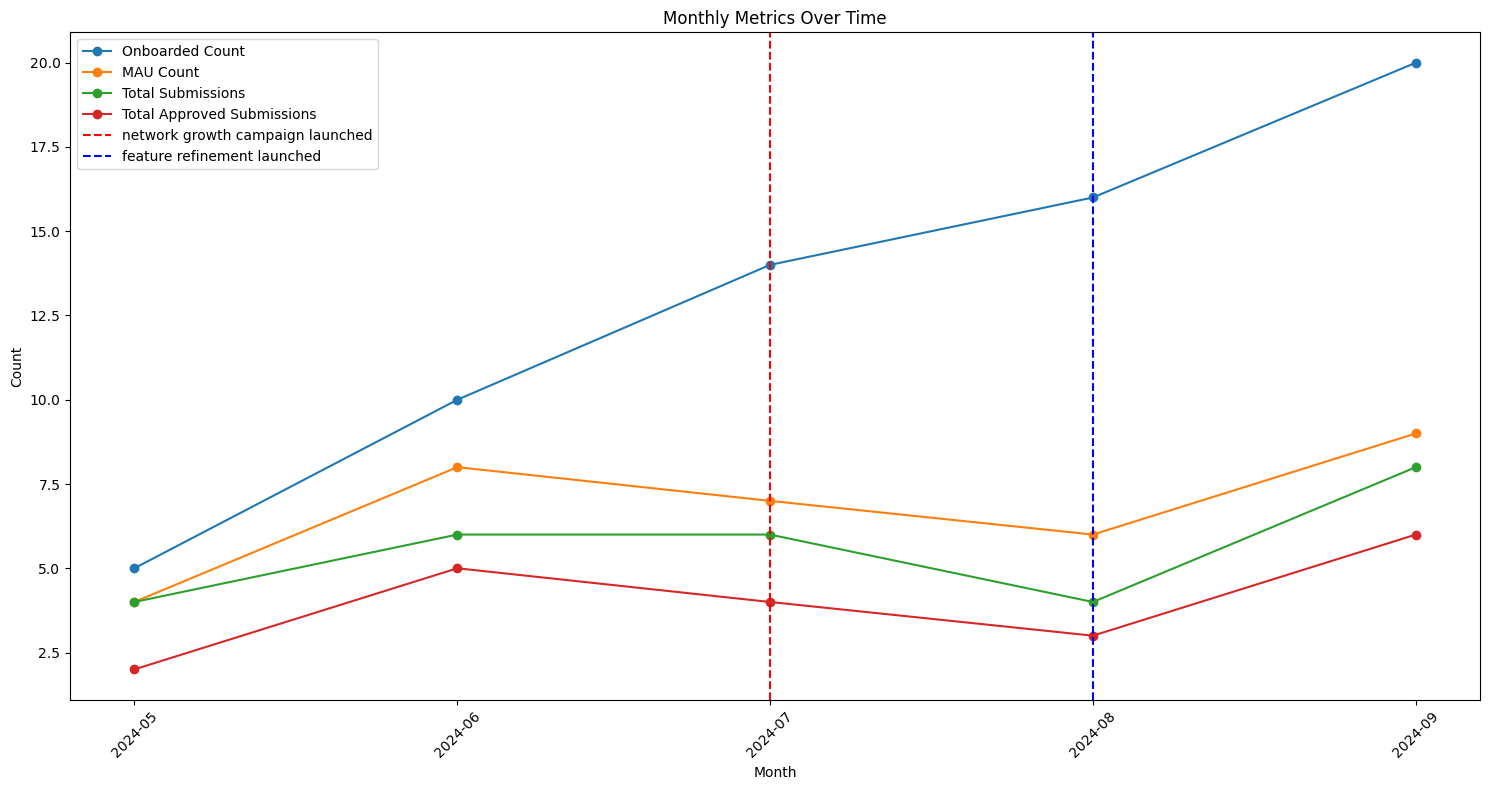

<Figure size 640x480 with 0 Axes>

<class 'FileNotFoundError'>: [Errno 44] No such file or directory: 'fig/monthly_metrics.png'

In [59]:
# Define vertical line dates and labels
campaign_date = pd.to_datetime('2024-07-01')
refinement_date = pd.to_datetime('2024-08-01')
campaign_label = "network growth campaign launched"
refinement_label = "feature refinement launched"

# Visualization 1: Onboarded Count, MAU Count, Total Submissions, and Approved Submissions over Time
plt.figure(figsize=(15, 8))
plt.plot(df['month_start'], df['onboarded_count'], label='Onboarded Count', marker='o')
plt.plot(df['month_start'], df['mau_count'], label='MAU Count', marker='o')
plt.plot(df['month_start'], df['total_submissions'], label='Total Submissions', marker='o')
plt.plot(df['month_start'], df['total_approved_submissions'], label='Total Approved Submissions', marker='o')
plt.title('Monthly Metrics Over Time')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)

# Add vertical lines and labels
plt.axvline(x=campaign_date, color='red', linestyle='--', label=campaign_label)
plt.axvline(x=refinement_date, color='blue', linestyle='--', label=refinement_label)
plt.legend()

plt.tight_layout()
plt.show()
plt.savefig('fig/monthly_metrics.png') # Save plot 1
plt.close() # Close the figure to free up memory

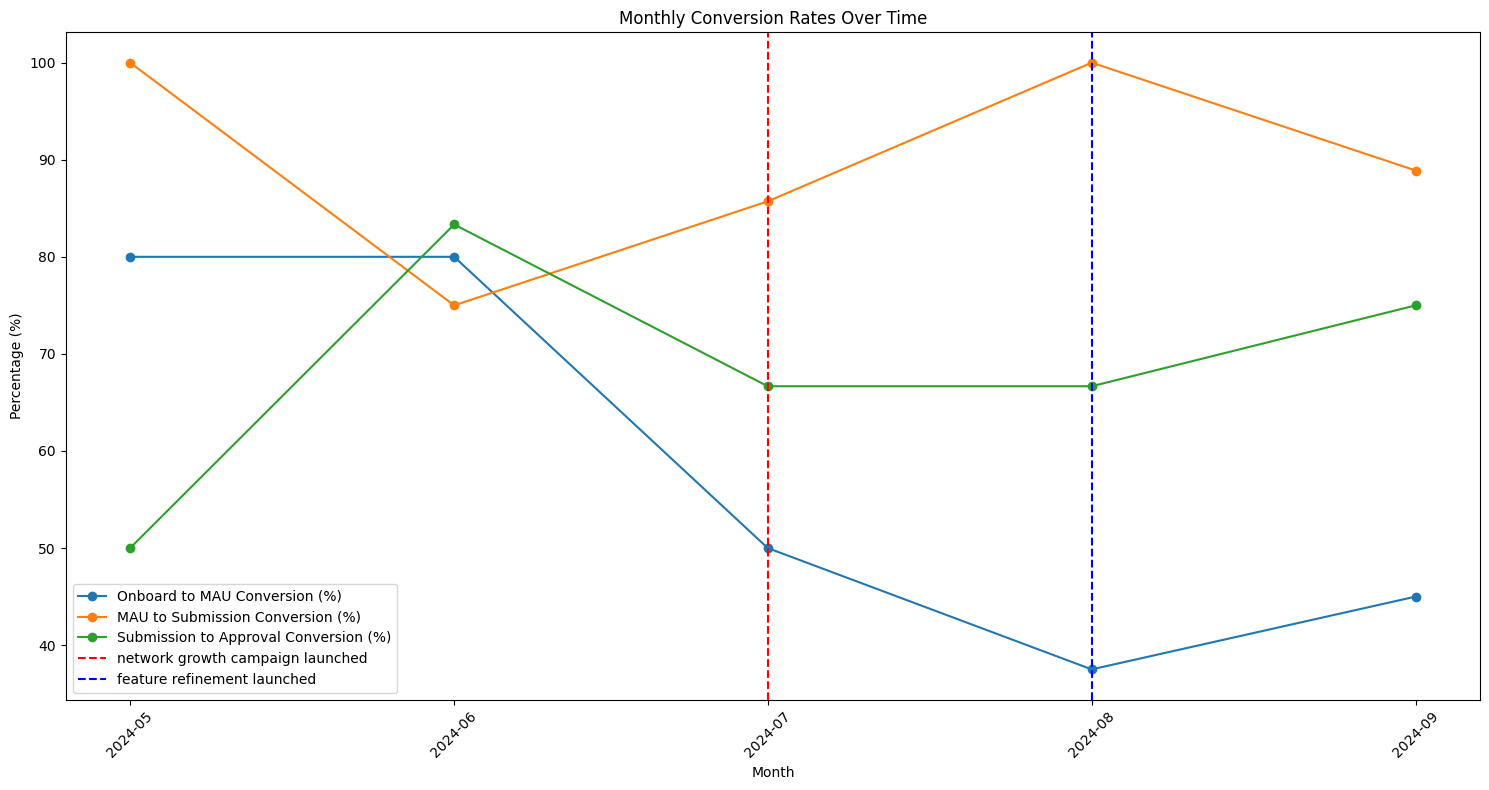

<Figure size 640x480 with 0 Axes>

<class 'FileNotFoundError'>: [Errno 44] No such file or directory: 'fig/conversion_rates.png'

In [63]:
# Visualization 2: Conversion Rates Over Time
plt.figure(figsize=(15, 8))
plt.plot(df['month_start'], df['onboard_to_mau_conversion'], label='Onboard to MAU Conversion (%)', marker='o')
plt.plot(df['month_start'], df['mau_to_submission_conversion'], label='MAU to Submission Conversion (%)', marker='o')
plt.plot(df['month_start'], df['submission_to_approval_conversion'], label='Submission to Approval Conversion (%)', marker='o')
plt.title('Monthly Conversion Rates Over Time')
plt.xlabel('Month')
plt.ylabel('Percentage (%)')
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)

# Add vertical lines and labels
plt.axvline(x=campaign_date, color='red', linestyle='--', label=campaign_label)
plt.axvline(x=refinement_date, color='blue', linestyle='--', label=refinement_label)
plt.legend()

plt.tight_layout()
plt.show()
plt.savefig('fig/conversion_rates.png') # Save plot 2
plt.close()

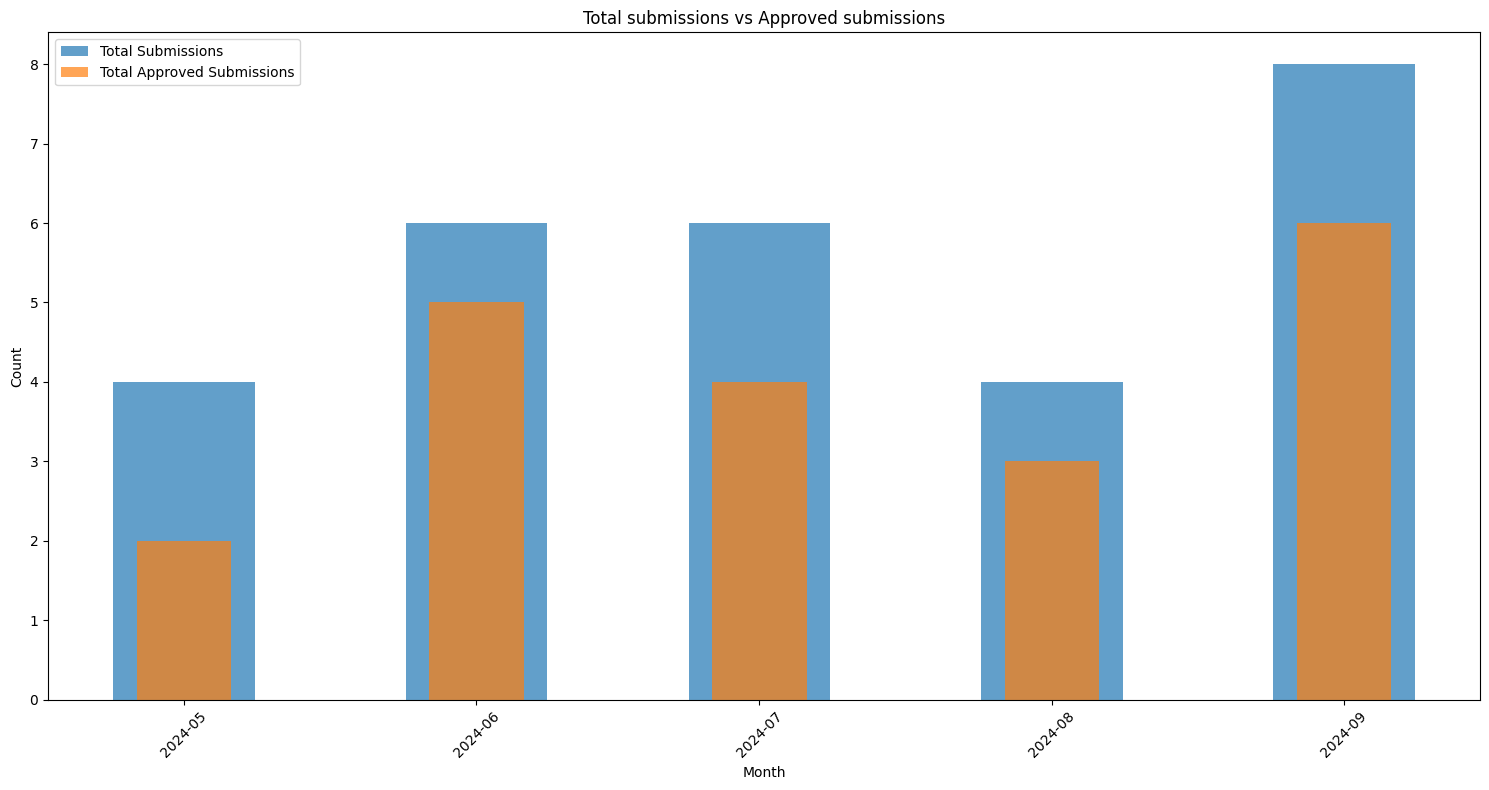

<Figure size 640x480 with 0 Axes>

<class 'FileNotFoundError'>: [Errno 44] No such file or directory: './fig/submission_approval_bars.png'

In [62]:
# Visualization 3: Bar chart of total submissions and approved submissions
plt.figure(figsize=(15, 8))
plt.bar(df['month_start'], df['total_submissions'], label="Total Submissions", alpha=0.7, width=15)
plt.bar(df['month_start'], df['total_approved_submissions'], label="Total Approved Submissions", alpha=0.7, width = 10)
plt.title("Total submissions vs Approved submissions")
plt.xlabel("Month")
plt.ylabel("Count")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig('./fig/submission_approval_bars.png') # Save plot 3
plt.close()

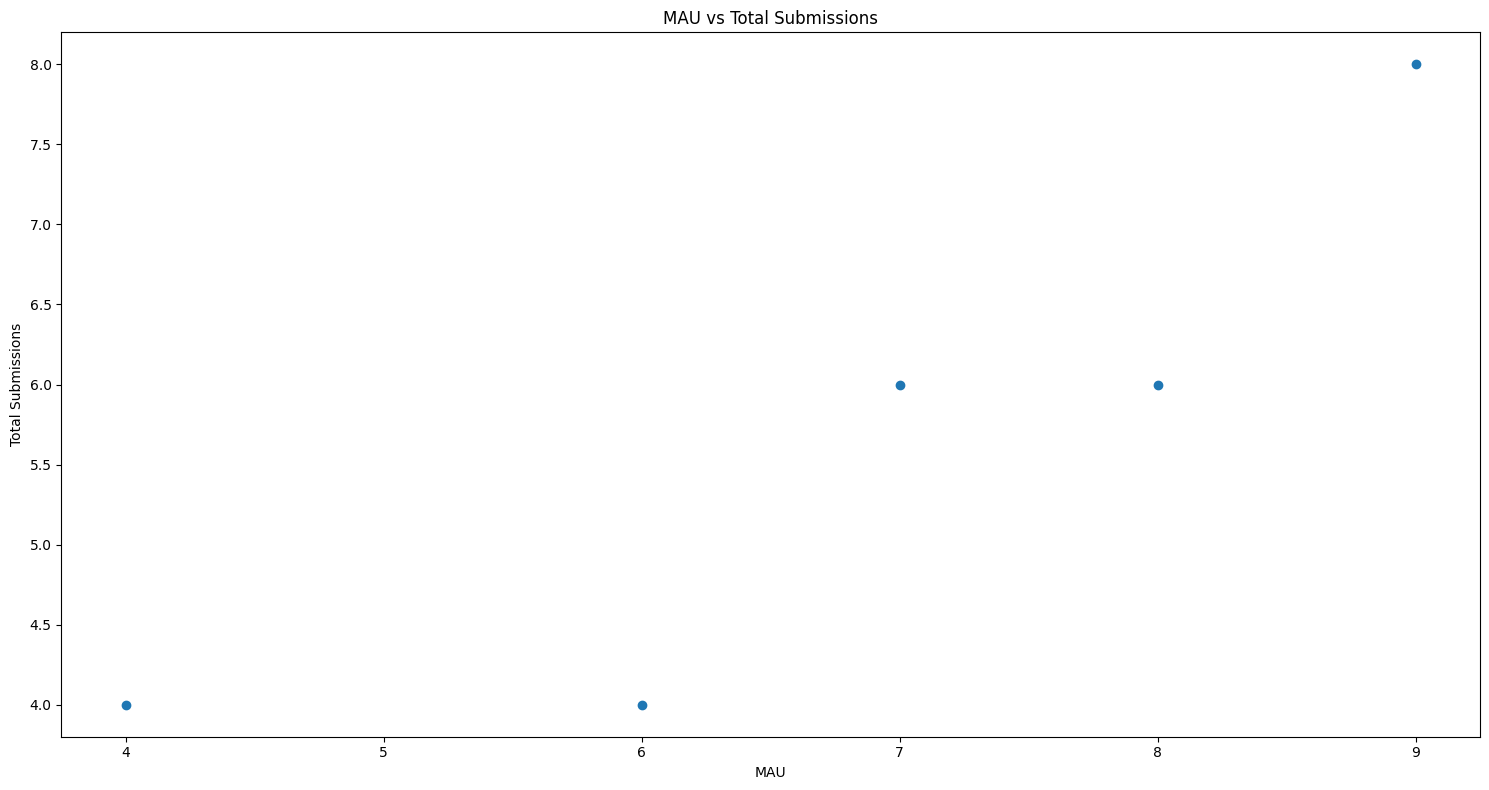

In [53]:
# Visualization 4: Scatter Plot of MAU vs Total Submissions
plt.figure(figsize=(15, 8))
plt.scatter(df['mau_count'], df['total_submissions'])
plt.title("MAU vs Total Submissions")
plt.xlabel("MAU")
plt.ylabel("Total Submissions")
plt.tight_layout()
plt.show()
plt.savefig('fig/mau_vs_submissions.png') # Save plot 4
plt.close()